<a href="https://colab.research.google.com/github/i-am-parker01/Linear_Regression_model/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('economic_index.csv.csv')

In [ ]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [ ]:
# Dropping unecessary columns
df.drop(columns=['year','month'],axis=1,inplace=True)

In [ ]:
df.head()

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866


In [ ]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


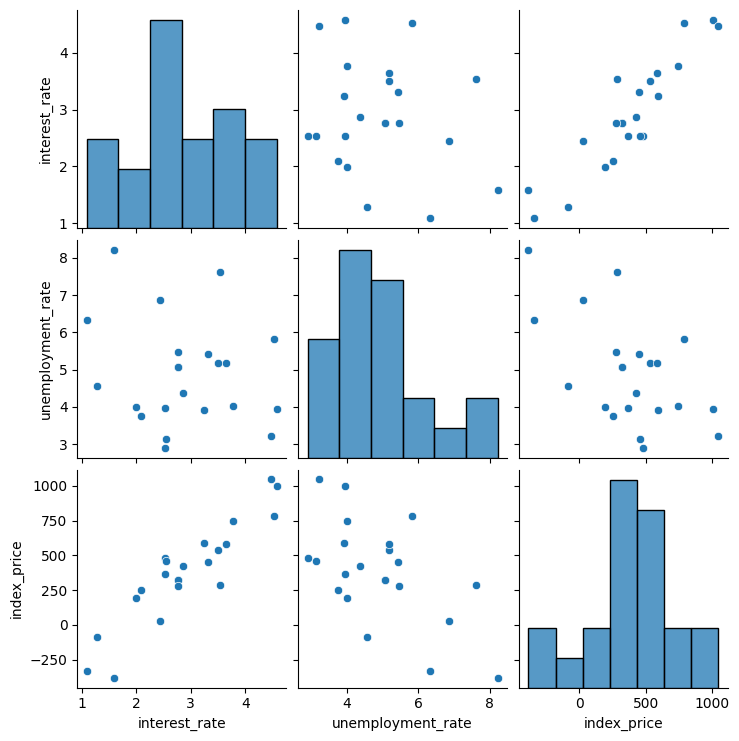

In [ ]:
##Visualization...
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.187663,0.912741
unemployment_rate,-0.187663,1.000000,-0.572569
index_price,0.912741,-0.572569,1.000000


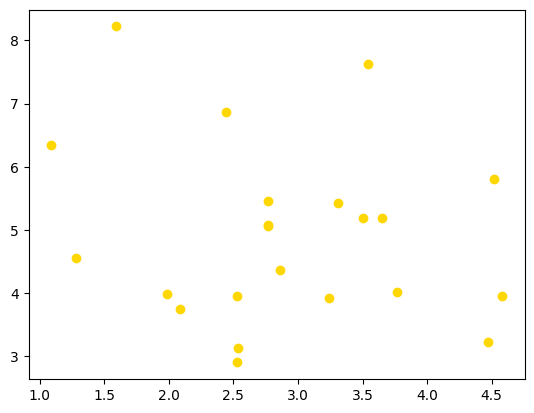

In [ ]:
##Visualizind DATA more closely...
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='gold')

In [ ]:
##Getting independent and dependent Features...
# X=df_index[['intrest_rate','unemployment_rate']]
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]


In [ ]:
X.head()

,interest_rate,unemployment_rate
0,3.50,5.19
1,2.86,4.36
2,3.65,5.18
3,4.52,5.81
4,2.77,5.07


In [ ]:
##Train-Test Split...
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: >

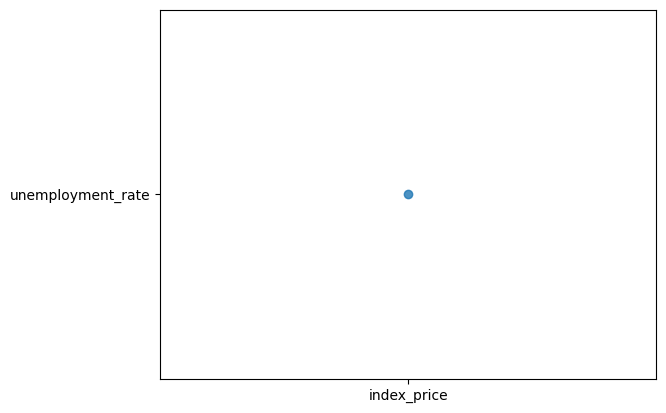

In [ ]:
import seaborn as sns
sns.regplot(x=['index_price'],y=['unemployment_rate'],data=df)

In [ ]:
# Standardization...
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X_train

array([[ 1.44195469, -1.14480869],
       [-0.51426356, -0.61841899],
       [ 1.49237269,  0.69755528],
       [-0.27225718,  0.17116557],
       [ 0.27225718,  0.42013368],
       [ 0.20167199, -0.64687248],
       [-0.95794193, -0.76779985],
       [-1.05877792, -0.59707886],
       [ 0.61509955,  0.24941269],
       [ 0.50417996,  1.98507604],
       [-0.27225718,  0.44858717],
       [ 0.73610275, -0.58285212],
       [-0.50417996, -1.20882906],
       [-1.77471347, -0.19161652],
       [-1.46212189,  2.41187851],
       [ 1.55287429, -0.62553236]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [ ]:
regression.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Cross-Validation...
from sklearn.model_selection import cross_val_score
score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [ ]:
# calculating average of score...
np.mean(score)

-0.0016352487576986926

In [ ]:
##Prediction...
y_pred=regression.predict(X_test)

In [ ]:
y_pred

array([ 534.72804447, -335.04281478,  478.2865903 ,  424.85761104,
         26.92894448,  322.29232332])

In [ ]:
# Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.0015050429639673788
0.03662494554502812
0.03879488321889085


In [ ]:
# r2 Score...
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)
# display adjusted r squared
print(1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))


0.9999999838953436
0.999999973158906


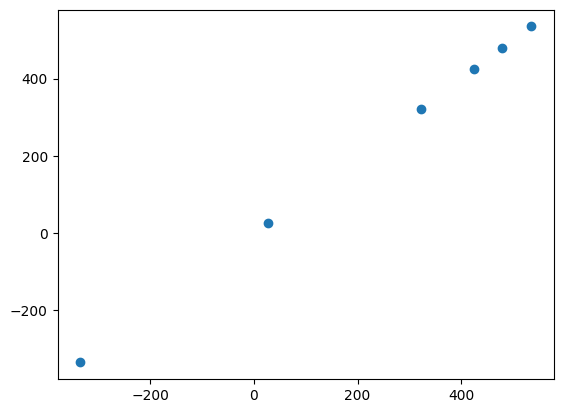

In [ ]:
# Assumptions...
plt.scatter(Y_test,y_pred)

In [ ]:
# Taking Errors...
residuals=Y_test-y_pred
print(residuals)

0    -0.013148
13   -0.039231
8     0.044719
1     0.053801
15   -0.029241
5    -0.039610
Name: index_price, dtype: float64


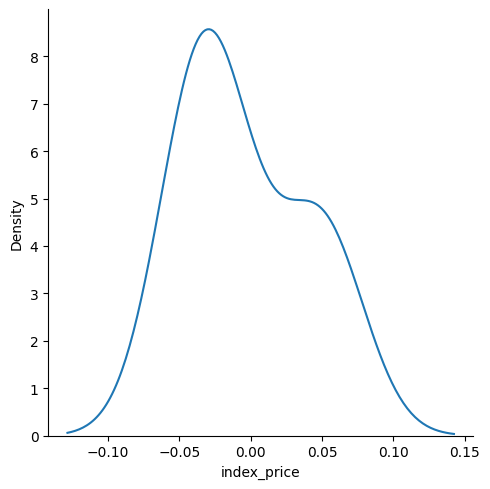

In [ ]:
# Plotting the above errors...
sns.displot(residuals,kind='kde')

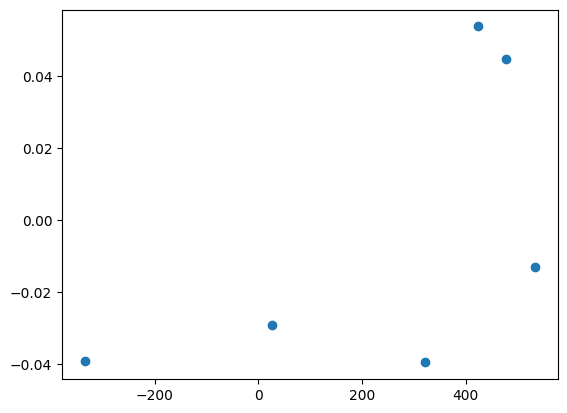

In [ ]:
# Scatter plot wrt prediction and residuals...
plt.scatter(y_pred,residuals)

In [ ]:
# computing OLS(ORDINARY LEAST SQUARE...)
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [ ]:
model.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.026e+06
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                    1.02e-41
Time:                        14:10:07   Log-Likelihood:                         -16.075
No. Observations:                  16   AIC:                                      36.15
Df Residuals:                      14   BIC:                                      37.69
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate       310.4720      0.128   2422.939      0.000     310.197     310.747
unemployment_rate  -106.3024      0.081  -1304.916      0.000    -106.477    -106.128
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.578
Skew:                          -0.181   Prob(JB):                        0.749
Kurtosis:                       2.142   Cond. No.                         4.92
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(regression.coef_)

[ 310.00285481 -106.6643297 ]
